# Dataset Information

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly imbalanced, with a vast majority of transactions being non-fraudulent (label 0) and only a very small fraction being fraudulent (label 1). The dataset consists of numerical features labeled as V1 to V28, which have been obtained through a Principal Component Analysis (PCA) transformation. This means the original features are not provided due to confidentiality reasons. 
However, 'Time' and 'Amount' are two non-transformed features available for use in modeling. 

'Time': Represents the time elapsed in seconds between each transaction and the first transaction in the dataset. It may be used to detect temporal patterns in transactions.

'Amount': Represents the transaction amount, which can be used to identify unusual transaction amounts associated with fraud.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

[Loan Prediction Dataset](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

# Load Dataset

In [2]:
df = 'C:/Users/philm/OneDrive/Documents/Loan Prediction Dataset.csv'

In [3]:
loan_data = pd.read_csv(df)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the Dataset

In [6]:
# Finding null values

loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Filling the missing values for numerical terms with the mean of the column

loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean())
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean())
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].mean())

In [8]:
# Filling the missing values for numerical terms with the mode

loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])

In [9]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

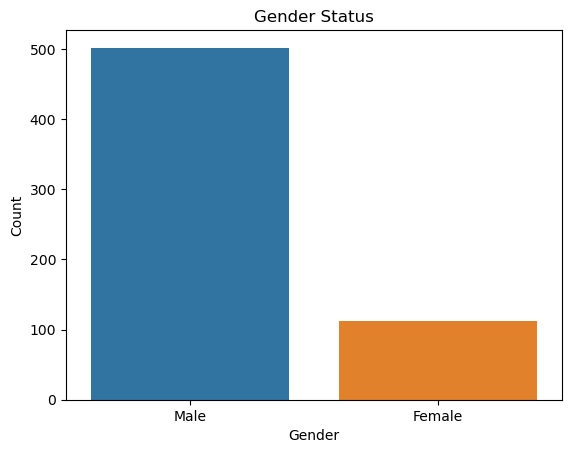

In [10]:


sns.countplot(data=loan_data, x='Gender')
plt.title('Gender Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

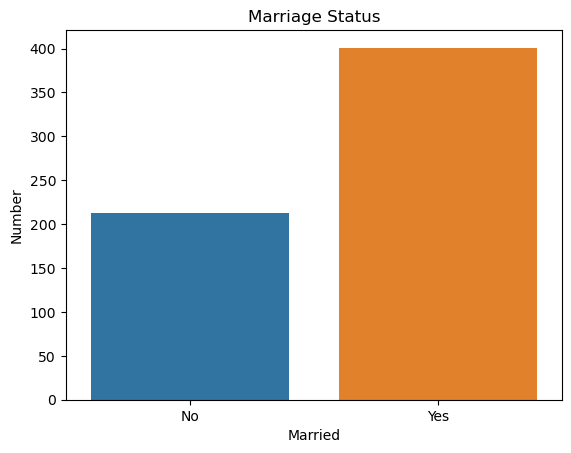

In [11]:
sns.countplot(data=loan_data, x='Married')
plt.title('Marriage Status')
plt.xlabel('Married')
plt.ylabel('Number')
plt.show()

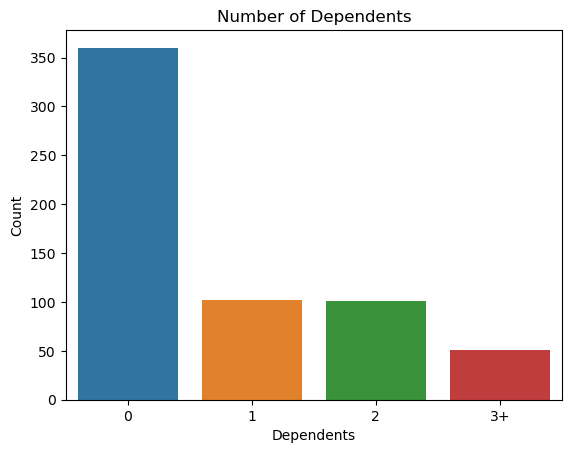

In [12]:
sns.countplot(data=loan_data, x='Dependents')
plt.title('Number of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

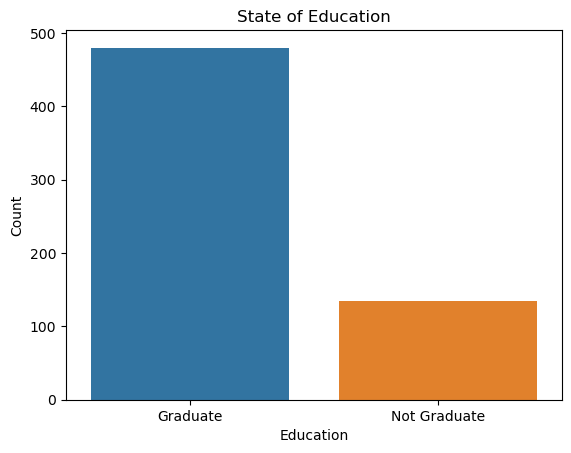

In [13]:
sns.countplot(data=loan_data, x='Education')
plt.title('State of Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

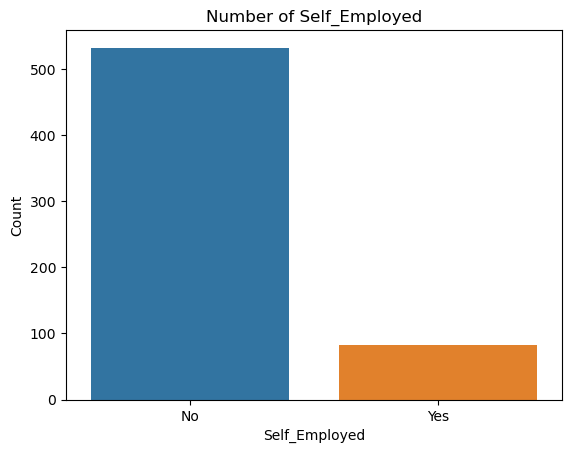

In [14]:
sns.countplot(data=loan_data, x='Self_Employed')
plt.title('Number of Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.show()

C:\Users\philm\AppData\Local\Temp\ipykernel_19524\381377322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

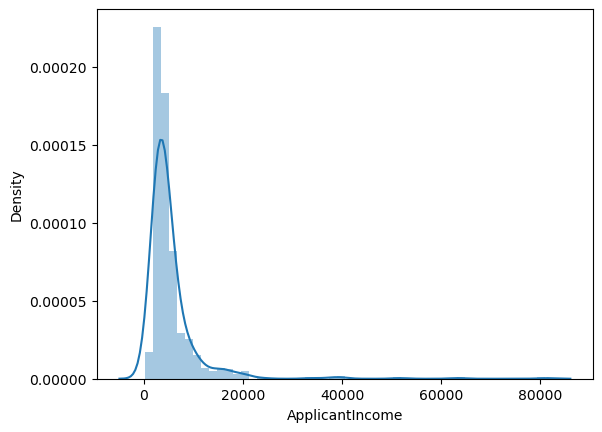

In [15]:
sns.distplot(loan_data['ApplicantIncome'])

In [16]:
# Apply log transformation to ApplicantIncome

loan_data["ApplicantIncome"] = np.log(loan_data["ApplicantIncome"])

C:\Users\philm\AppData\Local\Temp\ipykernel_19524\381377322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

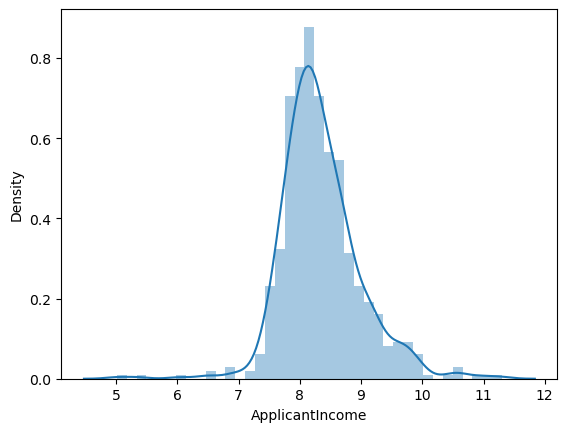

In [17]:
sns.distplot(loan_data['ApplicantIncome'])

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

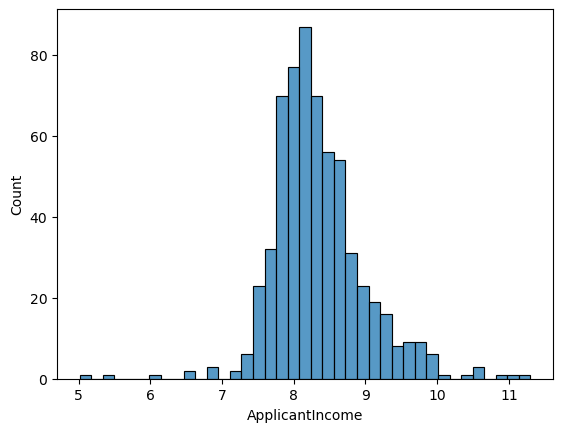

In [18]:
sns.histplot(loan_data['ApplicantIncome'])

C:\Users\philm\AppData\Local\Temp\ipykernel_19524\2993069508.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

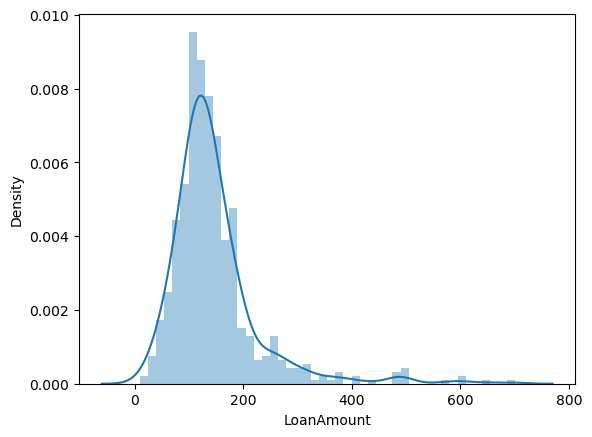

In [19]:
sns.distplot(loan_data['LoanAmount'])

In [20]:
loan_data["LoanAmount"] = np.log(loan_data["LoanAmount"])

C:\Users\philm\AppData\Local\Temp\ipykernel_19524\2993069508.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

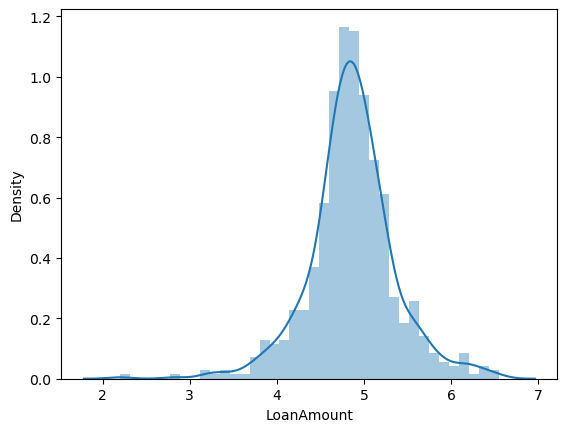

In [21]:
sns.distplot(loan_data['LoanAmount'])

C:\Users\philm\AppData\Local\Temp\ipykernel_19524\1849950208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

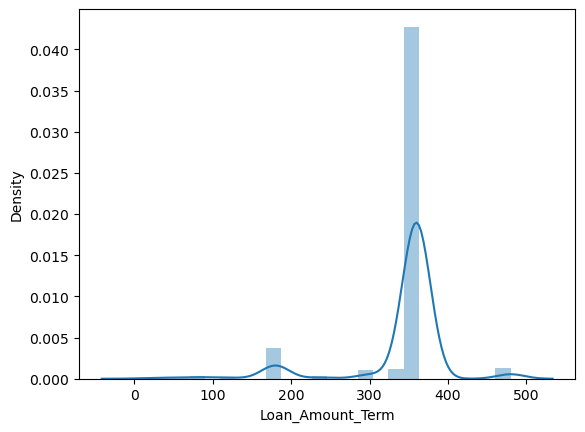

In [22]:
sns.distplot(loan_data['Loan_Amount_Term'])

In [23]:
loan_data["Loan_Amount_Term"] = np.log(loan_data["Loan_Amount_Term"])

C:\Users\philm\AppData\Local\Temp\ipykernel_19524\1849950208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

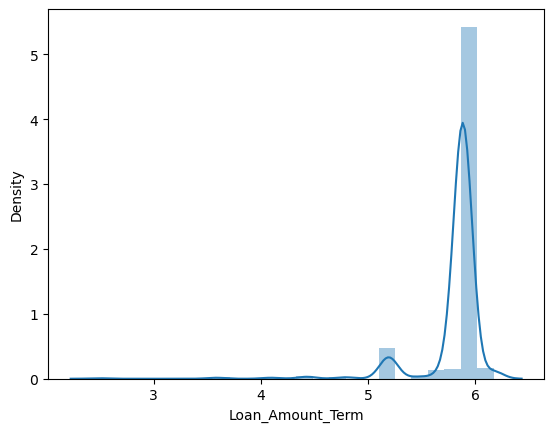

In [24]:
sns.distplot(loan_data['Loan_Amount_Term'])

C:\Users\philm\AppData\Local\Temp\ipykernel_19524\2095255485.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['Credit_History'])


<Axes: xlabel='Credit_History', ylabel='Density'>

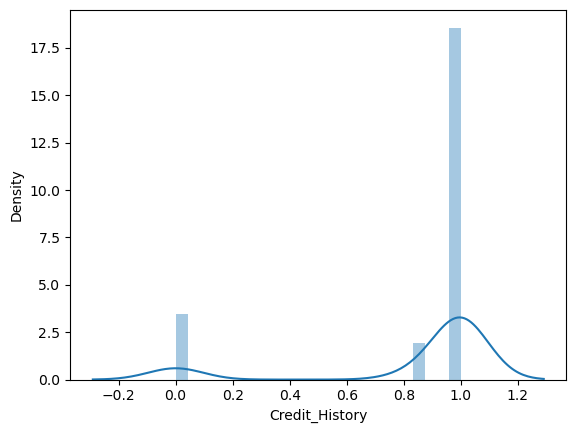

In [25]:
sns.distplot(loan_data['Credit_History'])

# Creating New Attributes

In [26]:
# Total Income

loan_data["Total_Income"] = loan_data["ApplicantIncome"] + loan_data["CoapplicantIncome"]
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,5.886104,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,N,1516.430109
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,Y,2365.856707
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,Y,8.699515


C:\Users\philm\AppData\Local\Temp\ipykernel_19524\3053893028.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['ApplicantIncome_log'])


<Axes: xlabel='ApplicantIncome_log', ylabel='Density'>

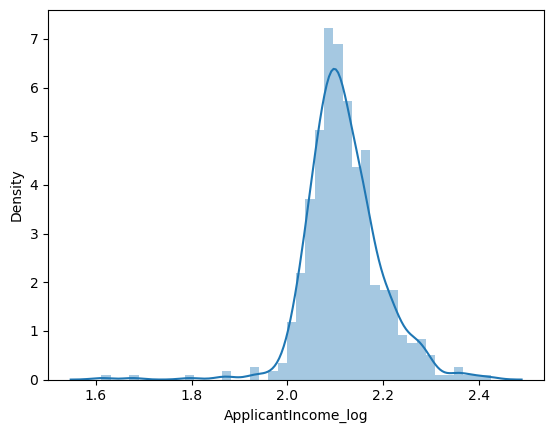

In [27]:
loan_data["ApplicantIncome_log"] = np.log(loan_data["ApplicantIncome"])
sns.distplot(loan_data['ApplicantIncome_log'])

C:\Users\philm\AppData\Local\Temp\ipykernel_19524\4062078003.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['LoanAmount_log'])


<Axes: xlabel='LoanAmount_log', ylabel='Density'>

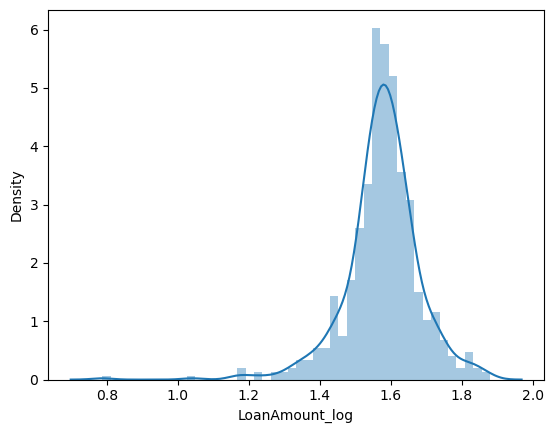

In [28]:
loan_data["LoanAmount_log"] = np.log(loan_data["LoanAmount"])
sns.distplot(loan_data['LoanAmount_log'])

C:\Users\philm\AppData\Local\Temp\ipykernel_19524\2307996821.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['Loan_Amount_Term_log'])


<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

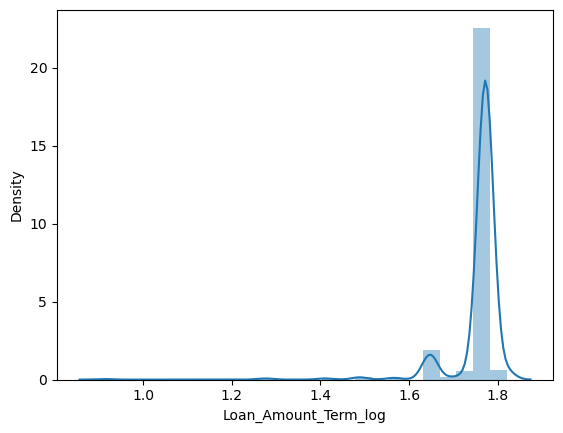

In [29]:
loan_data["Loan_Amount_Term_log"] = np.log(loan_data["Loan_Amount_Term"])
sns.distplot(loan_data['Loan_Amount_Term_log'])

C:\Users\philm\AppData\Local\Temp\ipykernel_19524\197208805.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data['Total_Income_log'])


<Axes: xlabel='Total_Income_log', ylabel='Density'>

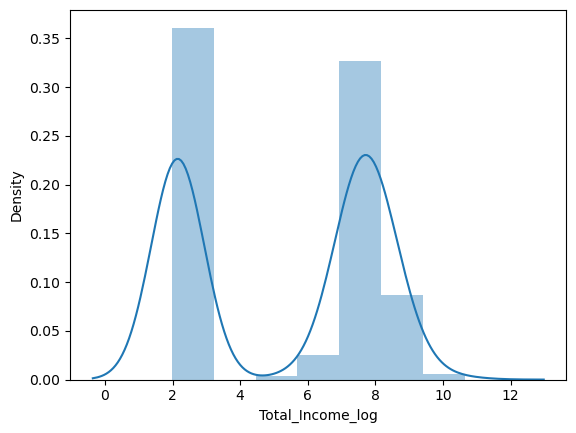

In [30]:
loan_data["Total_Income_log"] = np.log(loan_data["Total_Income"])
sns.distplot(loan_data['Total_Income_log'])

# Correlation Matrix

C:\Users\philm\AppData\Local\Temp\ipykernel_19524\311368535.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loan_data.corr()


<Axes: >

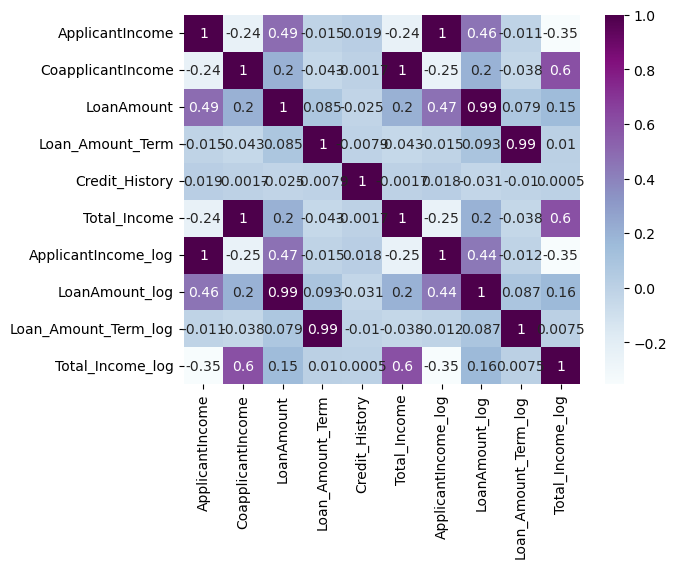

In [31]:
corr = loan_data.corr()
sns.heatmap(corr, annot = True, cmap = "BuPu")

C:\Users\philm\AppData\Local\Temp\ipykernel_19524\320937097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loan_data.corr()


<Axes: >

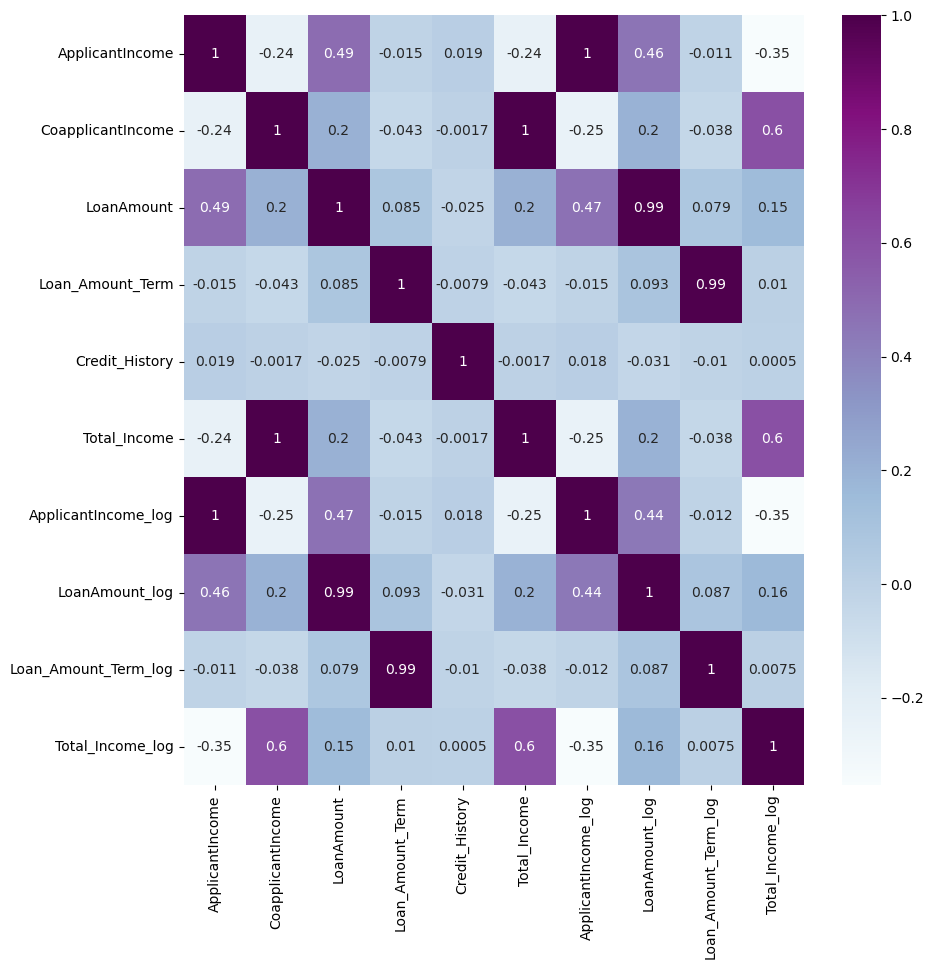

In [32]:
corr = loan_data.corr()
plt.figure(figsize =(10,10))
sns.heatmap(corr, annot = True, cmap = "BuPu")

In [33]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,5.886104,1.0,Urban,Y,8.674026,2.160333,1.606719,1.772594,2.160333
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,N,1516.430109,2.131810,1.579397,1.772594,7.324114
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,Y,8.006368,2.080237,1.432618,1.772594,2.080237
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,Y,2365.856707,2.061368,1.566007,1.772594,7.768895
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,Y,8.699515,2.163267,1.599137,1.772594,2.163267


In [34]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID']
loan_data = loan_data.drop(columns=cols, axis=1)
loan_data.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,2.160333,1.606719,1.772594,2.160333
1,Male,Yes,1,Graduate,No,1.0,Rural,N,2.131810,1.579397,1.772594,7.324114
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,2.080237,1.432618,1.772594,2.080237
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2.061368,1.566007,1.772594,7.768895
4,Male,No,0,Graduate,No,1.0,Urban,Y,2.163267,1.599137,1.772594,2.163267


# Label Encoding

In [35]:
# Converting Categorical Attributes into Numerical Attributes

from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    loan_data[col] = le.fit_transform(loan_data[col])

In [36]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,2.160333,1.606719,1.772594,2.160333
1,1,1,1,0,0,1.0,0,0,2.131810,1.579397,1.772594,7.324114
2,1,1,0,0,1,1.0,2,1,2.080237,1.432618,1.772594,2.080237
3,1,1,0,1,0,1.0,2,1,2.061368,1.566007,1.772594,7.768895
4,1,0,0,0,0,1.0,2,1,2.163267,1.599137,1.772594,2.163267


# Train-Test Split

In [37]:
# Specifying input and output attributes
X = loan_data.drop(columns=['Loan_Status'], axis=1)
y = loan_data['Loan_Status']

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Training

In [39]:
# classify function

from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


C:\Users\philm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\philm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 70.77922077922078
Cross validation is 72.63761162201786


In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 70.12987012987013
Cross validation is 72.80021324803411


In [43]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 75.97402597402598
Cross validation is 78.50593096094896


In [44]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 73.37662337662337
Cross validation is 76.7093162734906


# Hyperparameter tuning

In [45]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 79.15233906437426


# Confusion Matrix

In [46]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 30],
       [ 4, 96]], dtype=int64)

<Axes: >

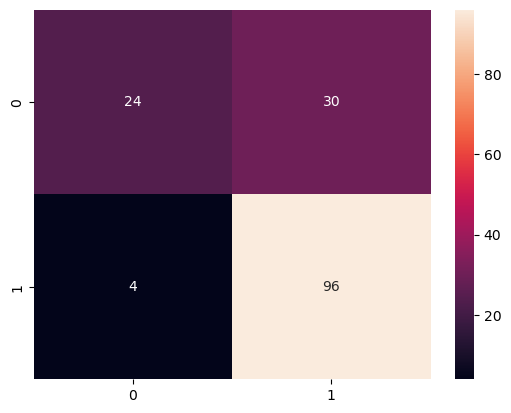

In [48]:
sns.heatmap(cm, annot=True)